<a href="https://colab.research.google.com/github/God-Of-Judge/Model_CJ/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master

/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master


In [ ]:
!pip install ujson
import ujson


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python crop_panel.py

/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/0/s01062899 0.png
/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/0/s01073749 0.png
/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/0/s01092226 0.png
/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/0/s01158869 0.png
/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/0/s01203590 0.png
Traceback (most recent call last):
  File "crop_panel.py", line 29, in <module>
    json_data = ujson.load(json)
  File "/usr/lib/python3.7/codecs.py", line 319, in decode
    def decode(self, input, final=False):
KeyboardInterrupt


In [ ]:
import os
import sys
if "/opt/ros/kinetic/lib/python2.7/dist-packages" in sys.path:
    sys.path.remove("/opt/ros/kinetic/lib/python2.7/dist-packages")
import cv2
import numpy as np
import shutil
from shutil import rmtree  

target_img_dir = "/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/images"
target_lb_dir = "/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/labels"



if (os.path.isdir(target_img_dir) == True):
  shutil.rmtree(target_img_dir)
else:
  os.mkdir(target_img_dir)

if (os.path.isdir(target_lb_dir) == True):
  shutil.rmtree(target_lb_dir)
else:
  os.mkdir(target_lb_dir)


lightstates = ["red","yellow","green","left_arrow"]
mapping_dict = {
    "1000":"0",
    "1001":"1",
    "0100":"2",
    "0010":"3",
    "0011":"4"}

    # mapping_dict = {
    # "1000":"red",
    # "1001":"redleft",
    # "0100":"yellow",
    # "0010":"green",
    # "0011":"greenleft"}
    # 1010: red+green --> 예외처리
    # 1100 : red+yellow --> 예외처리

visit = dict()

path = "/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/total/image"

imgnames = os.listdir(path)

for imgname in imgnames:
    imgpath = path+'/'+imgname
    jsonpath=imgpath.replace("/image","/json").replace(".jpg",".json").replace(".png",".json")
   
    img = None
    with open(jsonpath,"r") as json:
      json_data = ujson.load(json)
    
    index = 0

    imsize_w, imsize_h=json_data["image"]["imsize"]
    imgname = json_data["image"]["filename"]

    new_imgpath = target_img_dir+"/"+ imgname
    new_lbpath = new_imgpath.replace("/images","/labels").replace(".jpg", ".txt")
   

    for d in json_data["annotation"]:
      if d["class"] == "traffic_light" and d["type"] == "car" and d["direction"]=="horizontal":
        if d['attribute'][0]["others_arrow"] == "on" or d['attribute'][0]["x_light"] == "on":
          continue

        # if img is None:
        #   img = cv2.imread(path+"/"+imgname)
       
      
        light = ""
        for lightstate in lightstates:
            light += str(int(d['attribute'][0][lightstate] == "on"))
    
        if light=="0000" or light=="0001"or light=="1010"or light=="1100":
            continue
 
        light = mapping_dict[light]

       

        # print(line)
        print(imgname)  
        with open(new_lbpath, 'a') as f:
          x0,y0,x1,y1 = d["box"]
          xywh = [((x1+x0)/2)/imsize_w, (((y1+y0)/2))/imsize_h, (x1-x0)/imsize_w, (y1-y0)/imsize_h]  # xywh normalized
          line = int(light),*xywh  # YOLO format (class_index, xywh)
          f.write(('%g ' * len(line)).rstrip() % line + '\n')
       
        # with open(new_lbpath, 'a') as f:
        #   f.write('%s\n' % class_xywh )
        shutil.copy2(imgpath,new_imgpath)        
        # cropped_img = img[y0:y1,x0:x1]
        # if cropped_img.size == 0:
        #     continue

        # dstpath = target_dir+light+"/"+ imgname.replace(".jpg","").replace(".png","") + " " + str(index)+".png"
       
        # if not light in visit:
        #     visit[light]=1
        #     print(dstpath)
        #     cv2.imwrite(dstpath,cropped_img)
    index += 1
  

    


In [ ]:
# cd /
# from glob import glob
# pwd
# img_list=glob('/content/car_dataset/export/images/*.jpg')
# print(len(img_list))
# from sklearn.model_selection import train_test_split
# train_img_list,val_img_list=train_test_split(img_list,test_size=0.2,random_state=2000)
# print(len(train_img_list),len(val_img_list))
# with open('/content/car_dataset/train.txt','w') as f:
#   f.write('\n'.join(train_img_list)+'\n')
# with open('content/car_dataset/val.txt','w') as f:
#   f.write('\n'.join(val_img_list)+'\n')
# import yaml

# with open('content/car_dataset/data.yaml','r') as f:
# data=yaml.full_load(f)
# print(data)
# data['train'] = '/content/car_dataset/train.txt'
# data['val'] = '/content/car_dataset/val.txt'
# with open('/content/car_dataset/data.yaml','w') as f:
#   yaml.dump(data,f)
# print(data)

# cd /content/yolov5
# !python train.py --img 416 --batch 50 --epochs 20 --data /content/car_dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name car_yolov5s_results

In [ ]:
from glob import glob
img_list=glob('/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/images/*.jpg')
print(len(img_list))

775


In [ ]:
from sklearn.model_selection import train_test_split
train_img_list,val_img_list=train_test_split(img_list,test_size=0.2,random_state=2000)
print(len(train_img_list),len(val_img_list))

620 155


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/train.txt','w') as f:
  f.write('\n'.join(train_img_list)+'\n')
with open('/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/val.txt','w') as f:
  f.write('\n'.join(val_img_list)+'\n')

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master

/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 25.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import yaml
with open('/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/data.yaml','r') as f:
  data=yaml.full_load(f)
print(data)

{'path': '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset', 'train': '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/train.txt', 'val': '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/val.txt', 'test': 'test-dev2017.txt', 'nc': 5, 'names': ['red', 'redleft', 'yellow', 'green', 'greenleft']}


In [ ]:
data['train'] = '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/val.txt'
with open('/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/data.yaml','w') as f:
  yaml.dump(data,f)
print(data)

{'path': '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset', 'train': '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/train.txt', 'val': '/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master/dataset/val.txt', 'test': 'test-dev2017.txt', 'nc': 5, 'names': ['red', 'redleft', 'yellow', 'green', 'greenleft']}


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master

/content/drive/MyDrive/Colab Notebooks/yolov5-master/yolov5-master


In [ ]:
!python train.py --img 520 --batch 8 --epochs 5 --data ./dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name light_yolov5s_results

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=./dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=8, imgsz=520, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=light_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-7-10 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, 

In [ ]:
! python detect.py --weights runs/train/light_yolov5s_results7/weights/best.pt --source test/video_cross3.mp4

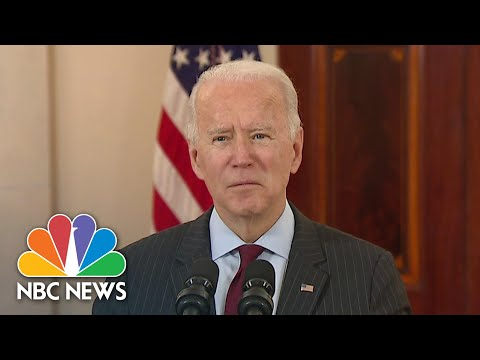

In [ ]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("b5akCiGbOl0", width=500)
display(video)

In [ ]:
!pip install youtube-dl   
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv 
!youtube-dl https://www.youtube.com/watch?v=b5akCiGbOl0 -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy test.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('test.mp4','rb').read()
data_url = "video.mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)


SyntaxError: ignored

In [ ]:
import cv2
import os


print(cv2.__version__)

filepath = './test/video_cross3.mp4'
video = cv2.VideoCapture(filepath) #'' 사이에 사용할 비디오 파일의 경로 및 이름을 넣어주도록 함

if not video.isOpened():
    print("Could not Open :", filepath)
    exit(0)


#불러온 비디오 파일의 정보 출력
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)

print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

#프레임을 저장할 디렉토리를 생성
try:
    if not os.path.exists(filepath[:-4]):
        os.makedirs(filepath[:-4])
except OSError:
    print ('Error: Creating directory. ' +  filepath[:-4])

count = 0

while(video.isOpened()):
    ret, image = video.read()
    if(int(video.get(1)) % fps == 0): #앞서 불러온 fps 값을 사용하여 1초마다 추출
        cv2.imwrite(filepath[:-4] + "/frame%d.jpg" % count, image)
        print('Saved frame number :', str(int(video.get(1))))
        count += 1
        
video.release()

